# Optimizing Deep Learning Model
In diesem Notebook besprechen wir die Optimierung eines Modells

## LOADING PACKAGES

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

%run Common_Experiment_Functions.ipynb

## LOADING DATA

In [2]:
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

## PROCESSING DATA

## Reshaping the explaining variable

In [3]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))

### Scaling the values

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### Categorizing Target Values

In [5]:
# save each number as one-hot category
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## OPTIMIZING DEEP LEARNING MODEL


### Optimizing Batch Size

In [6]:
#Initialize the measures
accuracy_measures = {}

for batch_size in range(16,128,16):

    #Load default configuration
    model_config = base_model_config()
    #Acquire and process input data

    #set epoch to 100
    model_config["EPOCHS"]=100
    #Set batch size to experiment value
    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history, model=create_and_run_model(model_config,x_train,y_train,model_name)

    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Batch-Size-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                25120     
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Batch-Size-32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)       

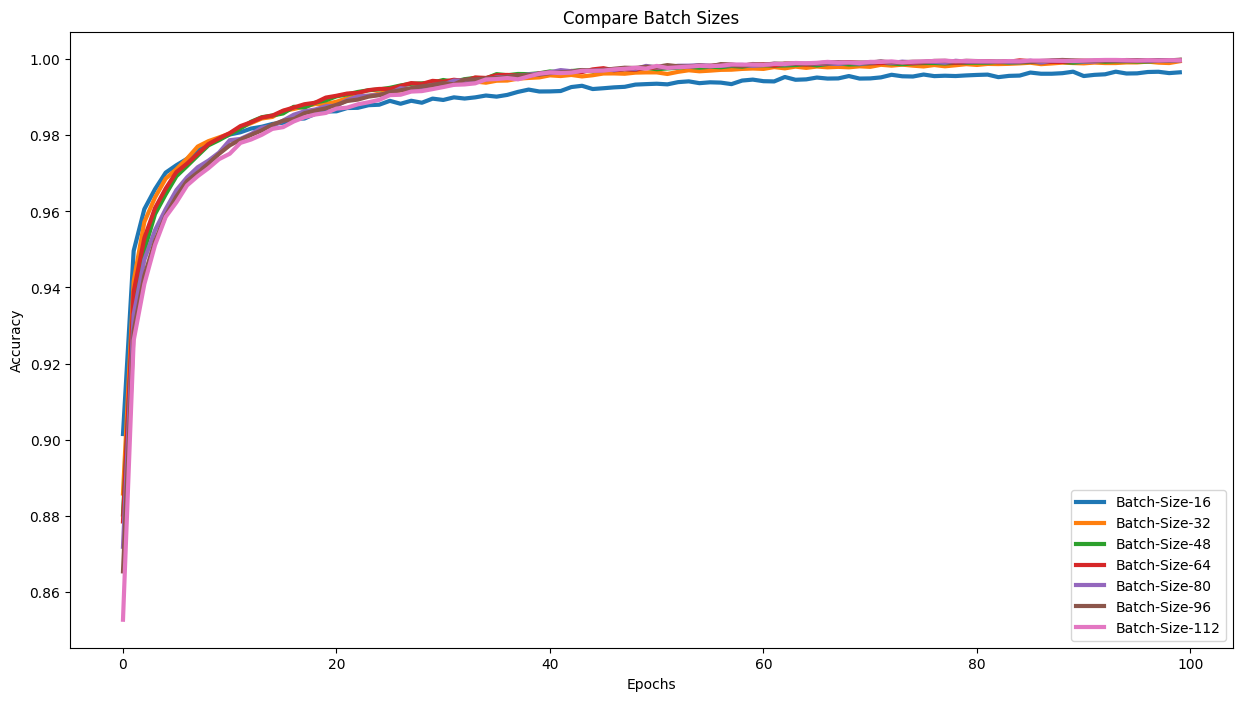

In [7]:
plot_graph(accuracy_measures, "Compare Batch Sizes")

### Optimizing the number of hidden layers

In [8]:
accuracy_measures = {}
layer_list =[]
for layer_count in range(1,6):

    #32 nodes in each layer
    layer_list.append(32)

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    history, model=create_and_run_model(model_config,x_train,y_train,model_name)

    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                25120     
                                                                 
 Output-Layer (Dense)        (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                25120     
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1

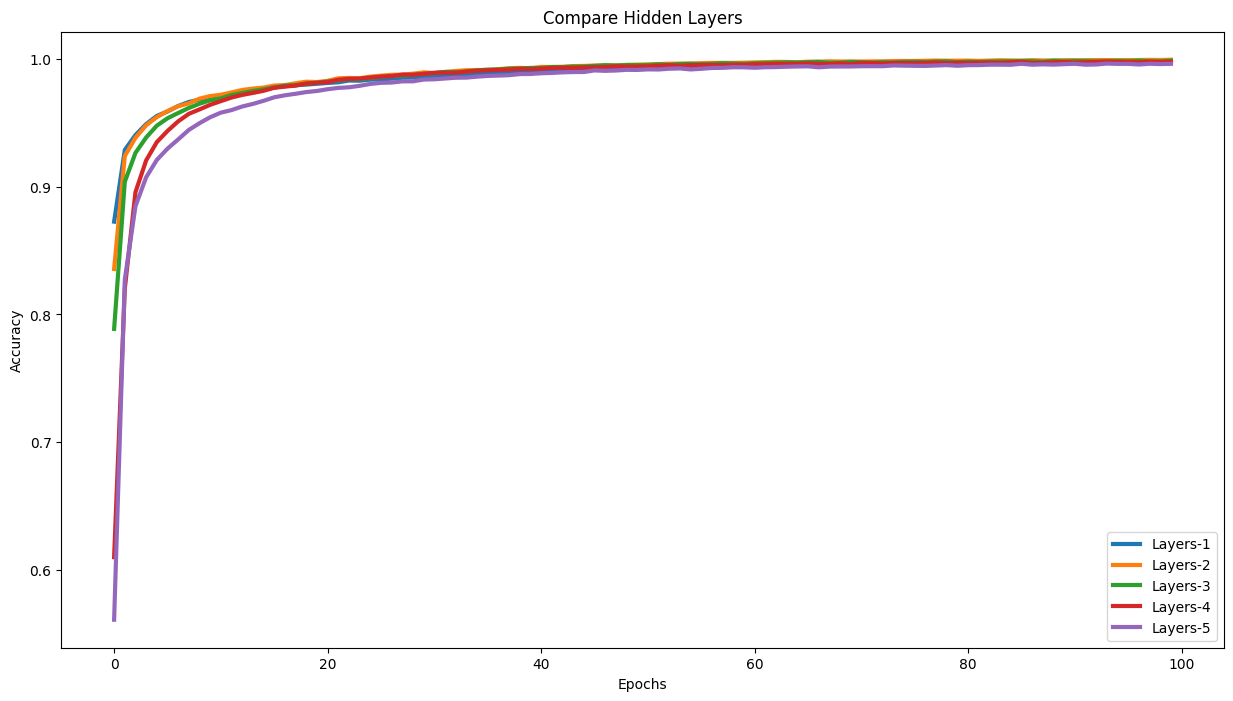

In [9]:
plot_graph(accuracy_measures, "Compare Hidden Layers")

### Optimizing number of hidden nodes

In [10]:
accuracy_measures = {}

node_increment=16

for node_count in range(1,8):

    #have 2 hidden layers in the networks as selected above
    layer_list =[]
    for layer_count in range(2):
        layer_list.append(node_count * node_increment)

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count * node_increment)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Nodes-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                12560     
                                                                 
 Dense-Layer-1 (Dense)       (None, 16)                272       
                                                                 
 Output-Layer (Dense)        (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Nodes-32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                2

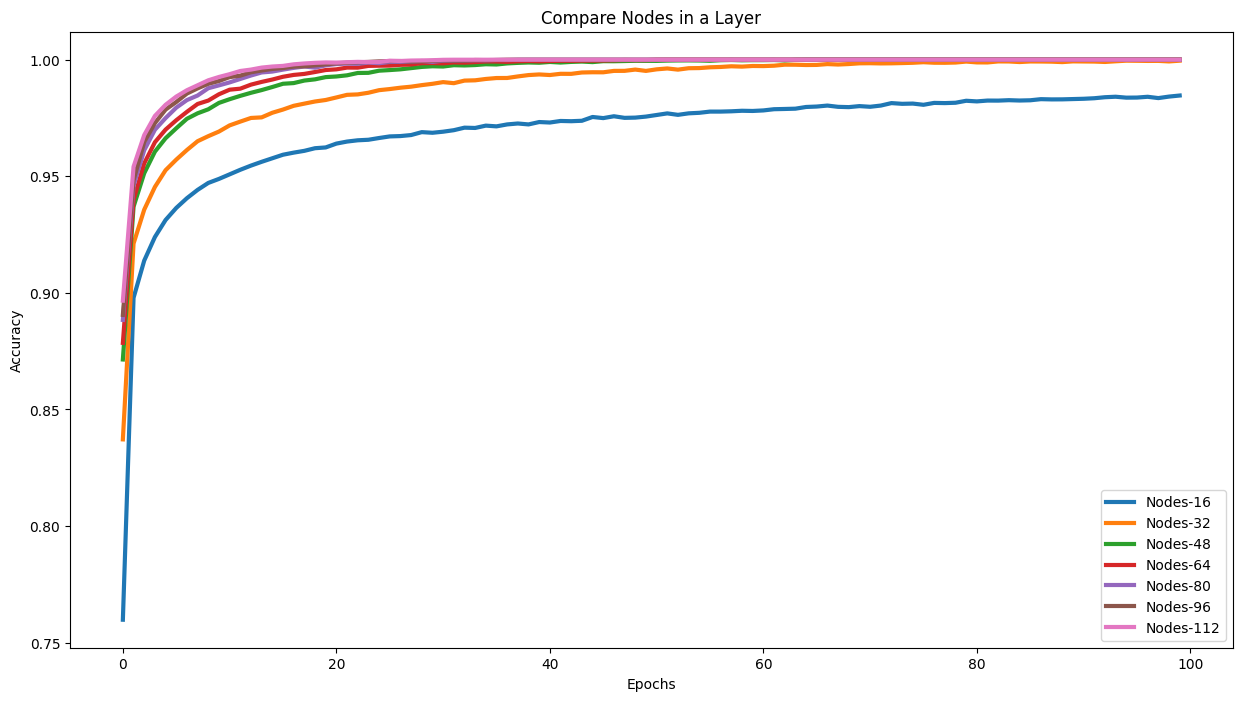

In [11]:
plot_graph(accuracy_measures, "Compare Nodes in a Layer")

### Optimizing Activation Function

In [12]:
accuracy_measures = {}

activation_list = ['relu','sigmoid','tanh']

for activation in activation_list:

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    # set hidden nodes to 80
    model_config["HIDDEN_NODES"] = [80,80]
    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history, model=create_and_run_model(model_config,x_train,y_train,model_name)

    accuracy_measures["Model-" + activation] = history.history["accuracy"]


******************************************************
Model: "Model-relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 80)                62800     
                                                                 
 Dense-Layer-1 (Dense)       (None, 80)                6480      
                                                                 
 Output-Layer (Dense)        (None, 10)                810       
                                                                 
Total params: 70,090
Trainable params: 70,090
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 80)          

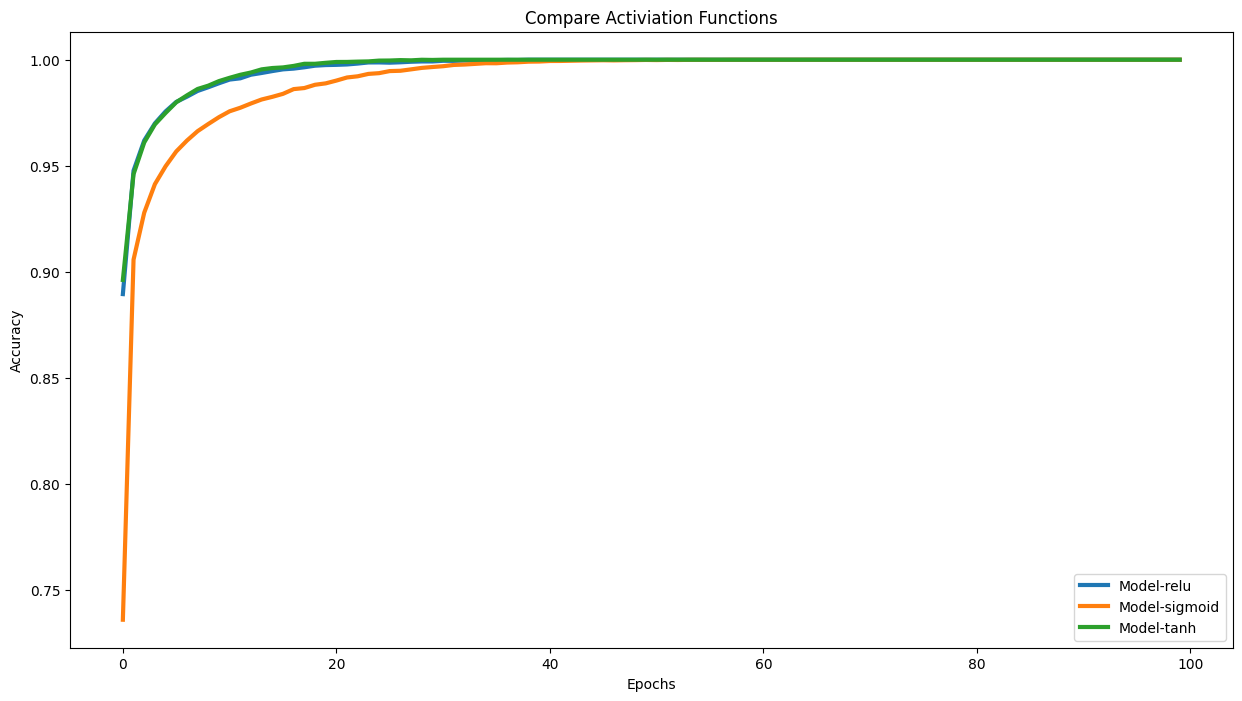

In [13]:
plot_graph(accuracy_measures, "Compare Activiation Functions")

### Optimizing Initializing Weigths

In [14]:
accuracy_measures = {}

initializer_list = ['random_normal','zeros','ones',"random_uniform"]
for initializer in initializer_list:

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    # set hidden nodes to 80
    model_config["HIDDEN_NODES"] = [80,80]
    # set activation to
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    model_config["WEIGHTS_INITIALIZER"] = initializer
    model_name = "Model-" + initializer
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Model-random_normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 80)                62800     
                                                                 
 Dense-Layer-1 (Dense)       (None, 80)                6480      
                                                                 
 Output-Layer (Dense)        (None, 10)                810       
                                                                 
Total params: 70,090
Trainable params: 70,090
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-zeros"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 80)   

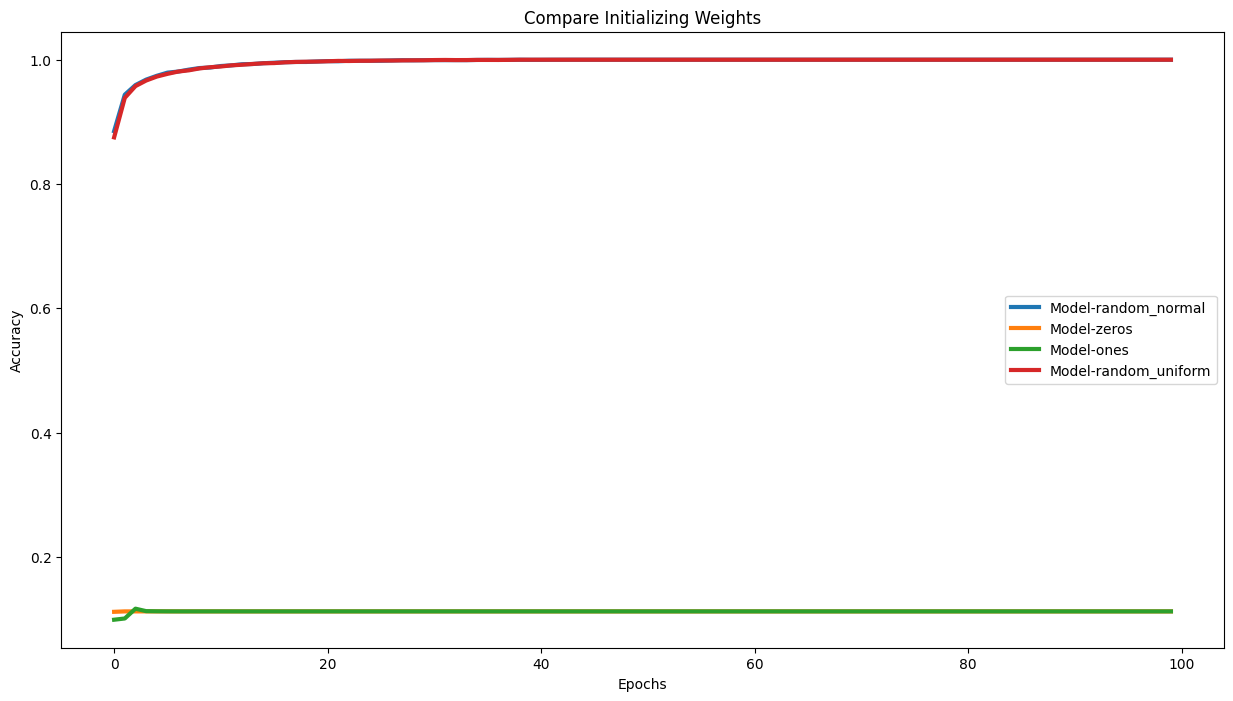

In [15]:
plot_graph(accuracy_measures, "Compare Initializing Weights")

## Optimizing Back Propagation

### Optimizing Optimizers

In [ ]:
accuracy_measures = {}

optimizer_list = ['sgd','rmsprop','adam','adagrad']
for optimizer in optimizer_list:

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    # set hidden nodes to 80
    model_config["HIDDEN_NODES"] = [80,80]
    # set activation to
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    # set initilaizer to 'random_normal'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]


******************************************************
Model: "Optimizer-sgd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 80)                62800     
                                                                 
 Dense-Layer-1 (Dense)       (None, 80)                6480      
                                                                 
 Output-Layer (Dense)        (None, 10)                810       
                                                                 
Total params: 70,090
Trainable params: 70,090
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Optimizer-rmsprop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 80)   

In [ ]:
plot_graph(accuracy_measures, "Compare Optimizers")

### Optimizing Learning Rates

In [ ]:
accuracy_measures = {}

learning_rate_list = [0.001, 0.005,0.01,0.1,0.5]
for learning_rate in learning_rate_list:

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    # set hidden nodes to 80
    model_config["HIDDEN_NODES"] = [80,80]
    # set activation to
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    # set initilaizer to 'random_normal'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
    #Fix Optimizer to the one chosen above
    model_config["OPTIMIZER"]="adam"
    model_config["LEARNING_RATE"] = learning_rate
    model_name="Learning-Rate-" + str(learning_rate)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    #Using validation accuracy
    accuracy_measures[model_name] = history.history["accuracy"]

In [ ]:
plot_graph(accuracy_measures, "Compare Learning Rates")

## Optimizing Overfitting

### Optimizing Regularization

In [ ]:
accuracy_measures = {}

regularizer_list = [None,'l1','l2','l1_l2']
for regularizer in regularizer_list:

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    # set hidden nodes to 80
    model_config["HIDDEN_NODES"] = [80,80]
    # set activation to
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    # set initilaizer to 'random_normal'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
    #Fix Optimizer to the one chosen above
    model_config["OPTIMIZER"]="adam"
    # set learning rate to
    model_config["LEARNING_RATE"] = 0.005
    model_config["REGULARIZER"] = regularizer
    model_name = "Regularizer-" + str(regularizer)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]

In [ ]:
plot_graph(accuracy_measures, "Compare Regularization")

### Optimizing Drop Out

In [ ]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
best_score = 0
for dropout in dropout_list:

    model_config = base_model_config()

    #set epoch to 100
    model_config["EPOCHS"]=100
    # set batch_size to 112
    model_config["BATCH_SIZE"] = 112
    # set hidden nodes to 80
    model_config["HIDDEN_NODES"] = [80,80]
    # set activation to
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    # set initilaizer to 'random_normal'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
    #Fix Optimizer to the one chosen above
    model_config["OPTIMIZER"]="adam"
    # set learning rate to
    model_config["LEARNING_RATE"] = 0.005
    # set learning rate to
    model_config["REGULARIZER"] = None
    model_config["DROPOUT_RATE"] = dropout
    model_name="Dropout-" + str(dropout)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    if score > best_score:
        best_score = score
        model.save()

    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]

In [ ]:
plot_graph(accuracy_measures, "Compare Dropouts")

## FINAL MODEL

In [ ]:
accuracy_measures = {}
loss_score = {}
accuracy_score = {}

###Base Minimal Model ####
model_config = base_model_config()
model_config["EPOCHS"]=100
# set hidden nodes to 80
model_config["HIDDEN_NODES"] = [16,16]

model_name = "Base-Model-" + str(layer_count)

history, model=create_and_run_model(model_config,x_train,y_train,model_name)
score = get_score(model,x_test,y_test)

accuracy_measures[model_name] = history.history["accuracy"]
loss_score[model_name] = score[0]
accuracy_score[model_name] = score[1]

### OPTIMIZED MODEL ####
#Adding all optimizations
model_config = base_model_config()
#set epoch to 100
model_config["EPOCHS"]=100
# set batch_size to 112
model_config["BATCH_SIZE"] = 112
# set hidden nodes to 80
model_config["HIDDEN_NODES"] = [80,80]
# set activation to relu
model_config["HIDDEN_ACTIVATION"] = 'relu'
# set initilaizer to 'random_normal'
model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
#Fix Optimizer to the one chosen above
model_config["OPTIMIZER"]="adam"
# set learning rate to 0.05
model_config["LEARNING_RATE"] = 0.05
# set learning rate to
model_config["REGULARIZER"] = None
# fix drop out to 0.2
model_config["DROPOUT_RATE"] = 0.2

model_name = "Optimized-Model-" + str(layer_count)

history, model=create_and_run_model(model_config,x_train,y_train,model_name)
score = get_score(model,x_test,y_test)

accuracy_measures[model_name] = history.history["accuracy"]
loss_score[model_name] = score[0]
accuracy_score[model_name] = score[1]

In [ ]:
plot_graph(accuracy_measures, "Compare Cumulative Improvements")

In [ ]:
loss_score

In [ ]:
accuracy_score

## Referenzen
Francois Chollet (2018), Deep Learning with Keras, Manning.
Kumaran Ponnambalam (2022), Deep Learning: Model Optimization and Tuning, LinkedIn Learning.